# Phonons At Γ In Diamond Structure Crystals   
**by <span style="color:darkgreen">Pasquale Pavone</span> for [<span style="color:darkgoldenrod">exciting *neon*</span>](https://www.exciting-code.org/neon)**

<font size="2">(Jupyter notebook by <span style="color:darkgreen">Jennifer Peschel</span>, <span style="color:darkgreen">Mara Voiculescu</span>, & <span style="color:darkgreen">Martin Kuban</span>)</font>
<hr style="border:2px solid #DDD"> </hr>

**<span style="color:firebrick">Purpose</span>**: In this tutorial, you will learn how to set up and execute a series of calculations for a crystal in the diamond structure, where the second atom in the unit cell is displaced along the cube diagonal. Additionally, it will be explained how to obtain the phonon frequency of the optical modes at **q**=0 (**Γ** point), by calculating the derivatives of the energy-vs-displacement and force-vs-displacement curves at zero displacement.
<hr style="border:2px solid #DDD"> </hr>

<div class="alert alert-block alert-warning">

**Table of Contents**
    
[0. Before Starting](#0)
    
[1. Set Up the Calculations](#1)  
      
   - [Preparation of the Input File](#1)
   - [Generation of Input Files for the Different Structures](#1.1)
    
[2. Execute the Calculations](#2)   
    
[3. Post-Processing: Extract Energy Derivatives](#3)      
    
[4. Post-Processing: Extract Force Derivatives](#4)
    
[5. Post-Processing: Visualization Tools](#5)
    
[6. Post-Processing: How to Derive the Optical Phonon Frequency at q=0 (Γ point)](#6)  
    
   - [Exercises](#6)
    
</div>

<a id='0'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">0. Before Starting</span>

**<span style="color:firebrick">Read the following paragraphs before starting with the rest of this tutorial!</span>**

Before running any Jupyter tutorials, please refer to the **`00_before_starting.md`** document on how to correctly set up the environment. This only needs to be done once. After which, the **venv** can be (re)activated from **`exciting`**'s root directory:

<div style="background-color: rgb(224, 224, 224);">

```bash
source tools/excitingjupyter/venv/excitingvenv/bin/activate
```

</div>

<a id='1'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">1. Set Up the Calculations</span>

**<span style="color:#15317E">i) Preparation of the Input File</span>**

The first step is to create a directory for each system that you want to investigate. In this tutorial, we consider as an example the calculation of the energy-vs-displacement curves for carbon in the diamond structure. Thus, we will create a directory **run_diamond_phonon_g**.

In [2]:
%%bash
mkdir -p run_diamond_phonon_g

Inside this directory, we create (or copy from a previous calculation) the file **input.xml** corresponding to a calculation for the equilibrium structure of diamond. This file could look like the following

<span class="DIAMOND_PHONON_G"></span>
```xml
<input>
 
   <title>Diamond: Phonons at Gamma</title>
 
   <structure speciespath="$EXCITINGROOT/species">
 
      <crystal scale="6.7468">
         <basevect> 0.5  0.5  0.0 </basevect>
         <basevect> 0.5  0.0  0.5 </basevect>
         <basevect> 0.0  0.5  0.5 </basevect>
      </crystal>
 
      <species speciesfile="C.xml" rmt="1.25">
         <atom coord="0.00 0.00 0.00" />
         <atom coord="0.25 0.25 0.25" />
      </species>
 
   </structure>
 
   <groundstate 
      ngridk="2 2 2"
      xctype="GGA_PBE"
      swidth="0.0001"
      rgkmax="4.0"
      gmaxvr="14"
      tforce="true">
   </groundstate>
 
</input>
```

In [3]:
from excitingjupyter.utilities import get_input_xml_from_notebook   

# Extract input file content from this notebook:
input_str = get_input_xml_from_notebook("01_tutorial_phonons_at_gamma_in_diamond_structure_crystals", "DIAMOND_PHONON_G")

# Write out the input as an XML file:
with open('./run_diamond_phonon_g/input.xml', "w") as fid:
    fid.write(input_str)

Please, remember that the input file for an **`exciting`** calculation must always be called **input.xml**. After creating the input file, set the path for the species file using the command

In [4]:
%%bash
cd run_diamond_phonon_g
python3 -m excitingscripts.setup.excitingroot
cd ..

**Furthermore**

- do **not** perform any structural optimization.

- perform the calculation of the force acting on the atoms by adding the <code><span style="color:mediumblue">tforce</span>=<span style="color:firebrick">"true"</span></code> attribute to the <code><span style="color:green">groundstate</span></code> element:

```xml
...
   <groundstate
      ...
      tforce="true">
   </groundstate>
...
```

<a id='1.1'></a>

**<span style="color:#15317E">ii) Generation of Input Files for the Different Structures</span>**

In order to generate input files for a series of different structures you have to run the script **`excitingscripts.setup.diamond_phonon_g`**. Notice that the script **`excitingscripts.setup.diamond_phonon_g`** always generates a working directory containing input files for different atomic displacements. Results of the current calculations will be also stored in the working directory (in this example **gamma_1**).

If the directory name is not given explicitly, the script **`excitingscripts.setup.diamond_phonon_g`** generates a directory called by default **workdir**.

**<span style="color:firebrick">Very important</span>**: The working directory is overwritten each time you execute the script **`excitingscripts.setup.diamond_phonon_g`**. Therefore, choose different names for different calculations.

The following command line arguments are also required:
- The first argument (in our example **<span style="color:firebrick">0.025</span>**) represents the absolute value of the maximum displacement (for each component, in crystal coordinates) for which we want to perform the calculation. 
- The second argument (**<span style="color:firebrick">11</span>**) is the number of structures equally spaced in the displacement of the second atom, which are generated between the maximum negative displacement and the maximum positive one.

In [5]:
%%bash
cd run_diamond_phonon_g
python3 -m excitingscripts.setup.diamond_phonon_g 0.025 11 -w gamma_1
cd ..

<a id='2'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">2. Execute the Calculations</span>

To execute the series of calculations with input files created by **`excitingscripts.setup.diamond_phonon_g`** you have to run the script **`excitingscripts.execute.diamond_phonon`**. If a name for the working directory has been specified, then you must give it here, too.

In [14]:
%%bash
cd run_diamond_phonon_g
python3 -m excitingscripts.execute.diamond_phonon -w gamma_1
cd ..

Now running exciting for run_dir: displ_-0.01
 Finished exciting run. Elapsed time: 4.6 seconds.
Now running exciting for run_dir: displ_-0.015
 Finished exciting run. Elapsed time: 5.0 seconds.
Now running exciting for run_dir: displ_0.01
 Finished exciting run. Elapsed time: 4.7 seconds.
Now running exciting for run_dir: displ_0.025
 Finished exciting run. Elapsed time: 5.1 seconds.
Now running exciting for run_dir: displ_-0.02
 Finished exciting run. Elapsed time: 5.5 seconds.
Now running exciting for run_dir: displ_0.02
 Finished exciting run. Elapsed time: 7.2 seconds.
Now running exciting for run_dir: displ_-0.005
 Finished exciting run. Elapsed time: 9.8 seconds.
Now running exciting for run_dir: displ_1e-06
 Finished exciting run. Elapsed time: 1.4e+01 seconds.
Now running exciting for run_dir: displ_0.015
 Finished exciting run. Elapsed time: 5.5 seconds.
Now running exciting for run_dir: displ_-0.025
 Finished exciting run. Elapsed time: 5.9 seconds.
Now running exciting for 

After the complete run, inside the directory **gamma_1** the results of the calculations  are contained in the subdirectories **displ_*d*** where **d** corresponds to the displacement value. The data for the energy-vs-displacement and force-vs-displacement curves are contained in the file **phonon_results.json**. More precisely, the force values correspond to the *x* component of the force acting on the second atom in the unit cell as a function of the displacement.

<a id='3'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">3. Post-Processing: Extract Energy Derivatives</span>

In order to analyse the results of the calculations, you first have to move to the working directory. At this point, you can use the python script **`excitingscripts.checkfit.energy_vs_displacement`** for extracting the derivatives of the energy-vs-displacement curves at zero displacement.

The first argument (in our example **<span style="color:firebrick">0.025</span>**) represents the absolute value of the maximum displacement for which we want to perform the analysis. The second argument (**<span style="color:firebrick">2</span>**) is the order of the derivative that we want to obtain. Finally, the third argument (**<span style="color:firebrick">12.01</span>**) is the atomic mass of carbon in units of [amu].

**<span style="color:firebrick">NOTICE</span>** that, in this example, the values which are given above as output on the screen are **<span style="color:firebrick">not</span>** directly the actual second derivative of the energy-vs-displacement curves, but the values of the frequency, i.e., combinations involving the **<span style="color:firebrick">square root of the derivative</span>** (see **[Section 6.](#6)** for the explanation).

The script **`excitingscripts.checkfit.energy_vs_displacement`** generates the output file **checkfit_energy_results.json**, which can be used in the post-processing analysis.

In [1]:
%%bash
cd run_diamond_phonon_g/gamma_1
python3 -m excitingscripts.checkfit.energy_vs_displacement 0.025 2 12.01
cd ../..


 Fit data

 Maximum value of the displacement: 0.025
 Number of displacement values used: 11
 Fit results for the derivative of order: 2

 Polynomial of order  2  ==>   1602.11 [cm-1]
 Polynomial of order  3  ==>   1602.12 [cm-1]
 Polynomial of order  4  ==>   1584.17 [cm-1]
 Polynomial of order  5  ==>   1584.17 [cm-1]
 Polynomial of order  6  ==>   1584.04 [cm-1]
 Polynomial of order  7  ==>   1584.04 [cm-1]

 Polynomial of order  2  ==>   48.0302 [THz]
 Polynomial of order  3  ==>   48.0302 [THz]
 Polynomial of order  4  ==>   47.4922 [THz]
 Polynomial of order  5  ==>   47.4922 [THz]
 Polynomial of order  6  ==>   47.4885 [THz]
 Polynomial of order  7  ==>   47.4885 [THz]




The output should look should look something like this:

```
 Fit data

 Maximum value of the displacement: 0.025
 Number of displacement values used: 11
 Fit results for the derivative of order: 2

 Polynomial of order  2  ==>   1602.11 [cm-1]
 Polynomial of order  3  ==>   1602.12 [cm-1]
 Polynomial of order  4  ==>   1584.17 [cm-1]
 Polynomial of order  5  ==>   1584.17 [cm-1]
 Polynomial of order  6  ==>   1584.04 [cm-1]
 Polynomial of order  7  ==>   1584.04 [cm-1]

 Polynomial of order  2  ==>   48.0302 [THz]
 Polynomial of order  3  ==>   48.0302 [THz]
 Polynomial of order  4  ==>   47.4922 [THz]
 Polynomial of order  5  ==>   47.4922 [THz]
 Polynomial of order  6  ==>   47.4885 [THz]
 Polynomial of order  7  ==>   47.4885 [THz]
``` 

<a id='4'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">4. Post-Processing: Extract Force Derivatives</span>

The procedure for extracting the derivatives of the force-vs-displacement curves is very similar to the one exposed in the previous Section for the energy-vs-displacement curves. You can use the python script **`excitingscripts.checkfit.force_vs_displacement`** for extracting the derivatives of the force-vs-displacement curves at zero displacement. The meaning of the input entries for this script is the same as for **`excitingscripts.checkfit.force_vs_displacement`** (see above). The only difference is that the **<span style="color:firebrick">derivative</span>** which one has to calculate in order to extract the phonon frequencies is the **<span style="color:firebrick">first</span>** one.

In [2]:
%%bash
cd run_diamond_phonon_g/gamma_1
python3 -m excitingscripts.checkfit.force_vs_displacement 0.025 1 12.01
cd ../..


 Fit data

 Maximum value of the displacement: 0.025
 Number of displacement values used: 11
 Fit results for the derivative of order: 1

 Polynomial of order  1  ==>   1605.97 [cm-1]
 Polynomial of order  2  ==>   1605.96 [cm-1]
 Polynomial of order  3  ==>   1580.60 [cm-1]
 Polynomial of order  4  ==>   1580.60 [cm-1]
 Polynomial of order  5  ==>   1580.62 [cm-1]
 Polynomial of order  6  ==>   1580.62 [cm-1]

 Polynomial of order  1  ==>   48.1456 [THz]
 Polynomial of order  2  ==>   48.1456 [THz]
 Polynomial of order  3  ==>   47.3852 [THz]
 Polynomial of order  4  ==>   47.3852 [THz]
 Polynomial of order  5  ==>   47.3859 [THz]
 Polynomial of order  6  ==>   47.3859 [THz]




The output should look should look something like this:

```
 Fit data

 Maximum value of the displacement: 0.025
 Number of displacement values used: 11
 Fit results for the derivative of order: 1

 Polynomial of order  1  ==>   1605.97 [cm-1]
 Polynomial of order  2  ==>   1605.96 [cm-1]
 Polynomial of order  3  ==>   1580.60 [cm-1]
 Polynomial of order  4  ==>   1580.60 [cm-1]
 Polynomial of order  5  ==>   1580.62 [cm-1]
 Polynomial of order  6  ==>   1580.62 [cm-1]

 Polynomial of order  1  ==>   48.1456 [THz]
 Polynomial of order  2  ==>   48.1456 [THz]
 Polynomial of order  3  ==>   47.3852 [THz]
 Polynomial of order  4  ==>   47.3852 [THz]
 Polynomial of order  5  ==>   47.3859 [THz]
 Polynomial of order  6  ==>   47.3859 [THz]
``` 

<a id='5'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">5. Post-Processing: Visualization Tools</span>

All the scripts mentioned here must be executed in the directory where the **phonon_results.json**, **checkfit_energy_results.json** and **checkfit_force_results.json** files are located.

**<span style="color:#15317E">i) excitingscripts.plot.energy</span>**

This script allows for the visualization of the energy-vs-displacement curve. It is executed as follows.

In [27]:
%%bash
cd run_diamond_phonon_g/gamma_1
python3 -m excitingscripts.plot.energy
cd ../..

In the following, we display the result for the example mentioned above.

<figure>
<img src=" 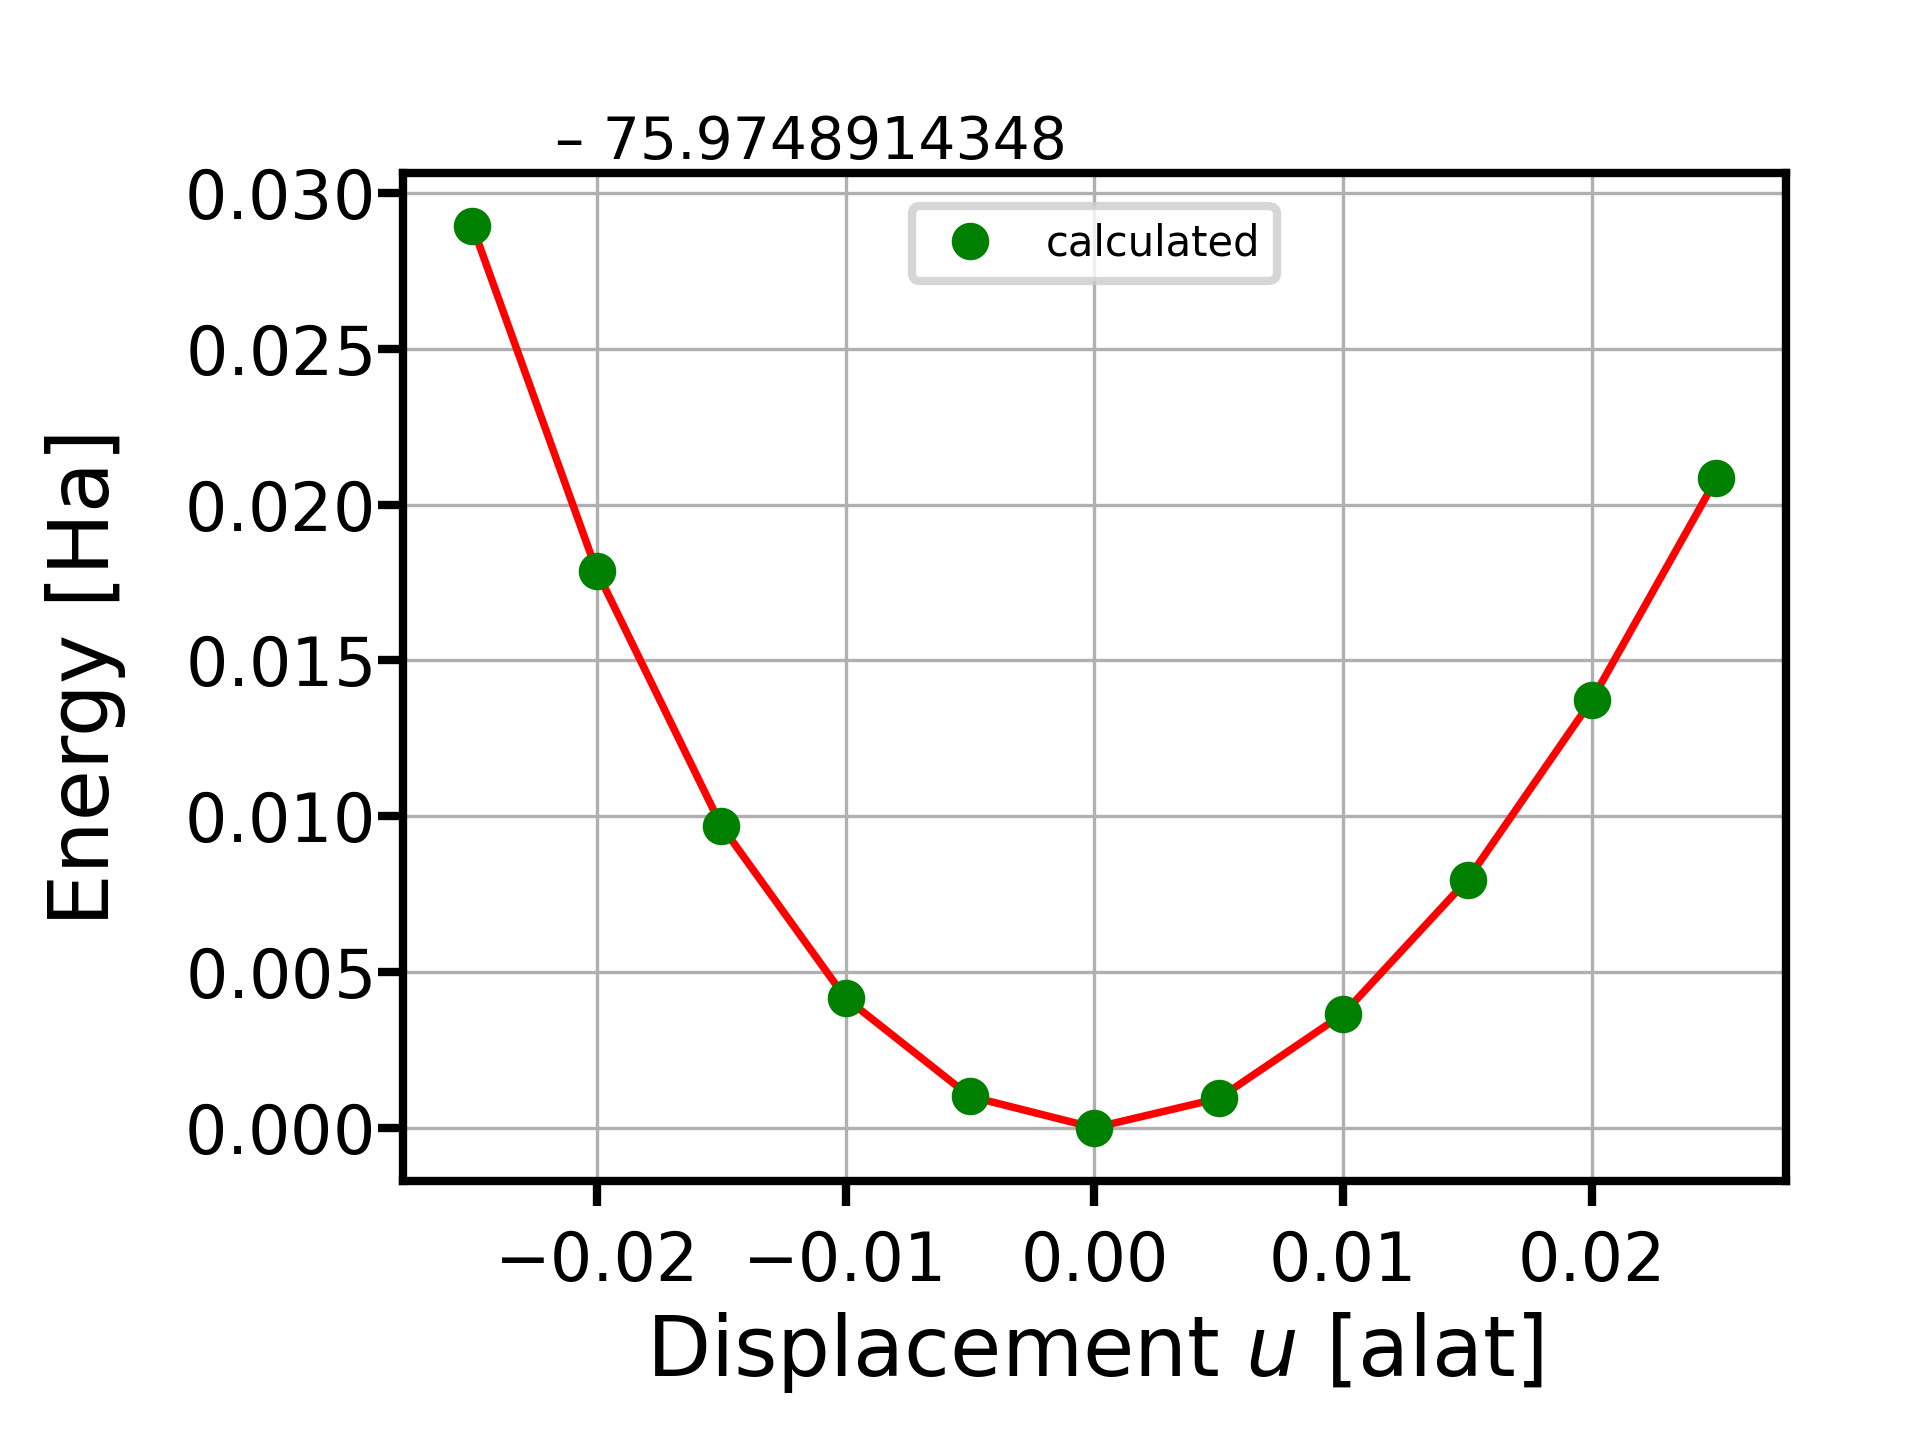" width="600" align="left"/>
</figure>

**<span style="color:#15317E">ii) excitingscripts.plot.checkderiv</span>**

This is a very important tool that allows to represent the dependence of the calculated derivatives of the energy-vs-displacement and force-vs-displacement curves on

- the range of points included in the fitting procedure (**<span style="color:firebrick">"maximum displacement u"</span>**),
- the maximum degree of the polynomial used in the fitting procedure (**<span style="color:firebrick">"n"</span>**).

If **`excitingscripts.plot.checkderiv`** is executed after **`excitingscripts.checkfit.energy_vs_displacement`** and by including the command line argument **<span style="color:firebrick">"energy"</span>**, it will give information on the energy derivatives, if it is executed after **`excitingscripts.checkfit.force_vs_displacement`** and by including the command line argument **<span style="color:firebrick">"force"</span>**, force derivatives are considered. The script **`excitingscripts.plot.checkderiv`** is executed as follows.

In [13]:
%%bash
cd run_diamond_phonon_g/gamma_1
python3 -m excitingscripts.plot.checkderiv energy
cd ../..

One or two optional entries can be specified on the calling line. Assigning numerical values to these two entries, you can set the minimum (**YMIN**) and the maximum (**YMAX**) value on the vertical axis, respectively. An example of the script output for the energy derivatives is the following.

<figure>
<img src=" 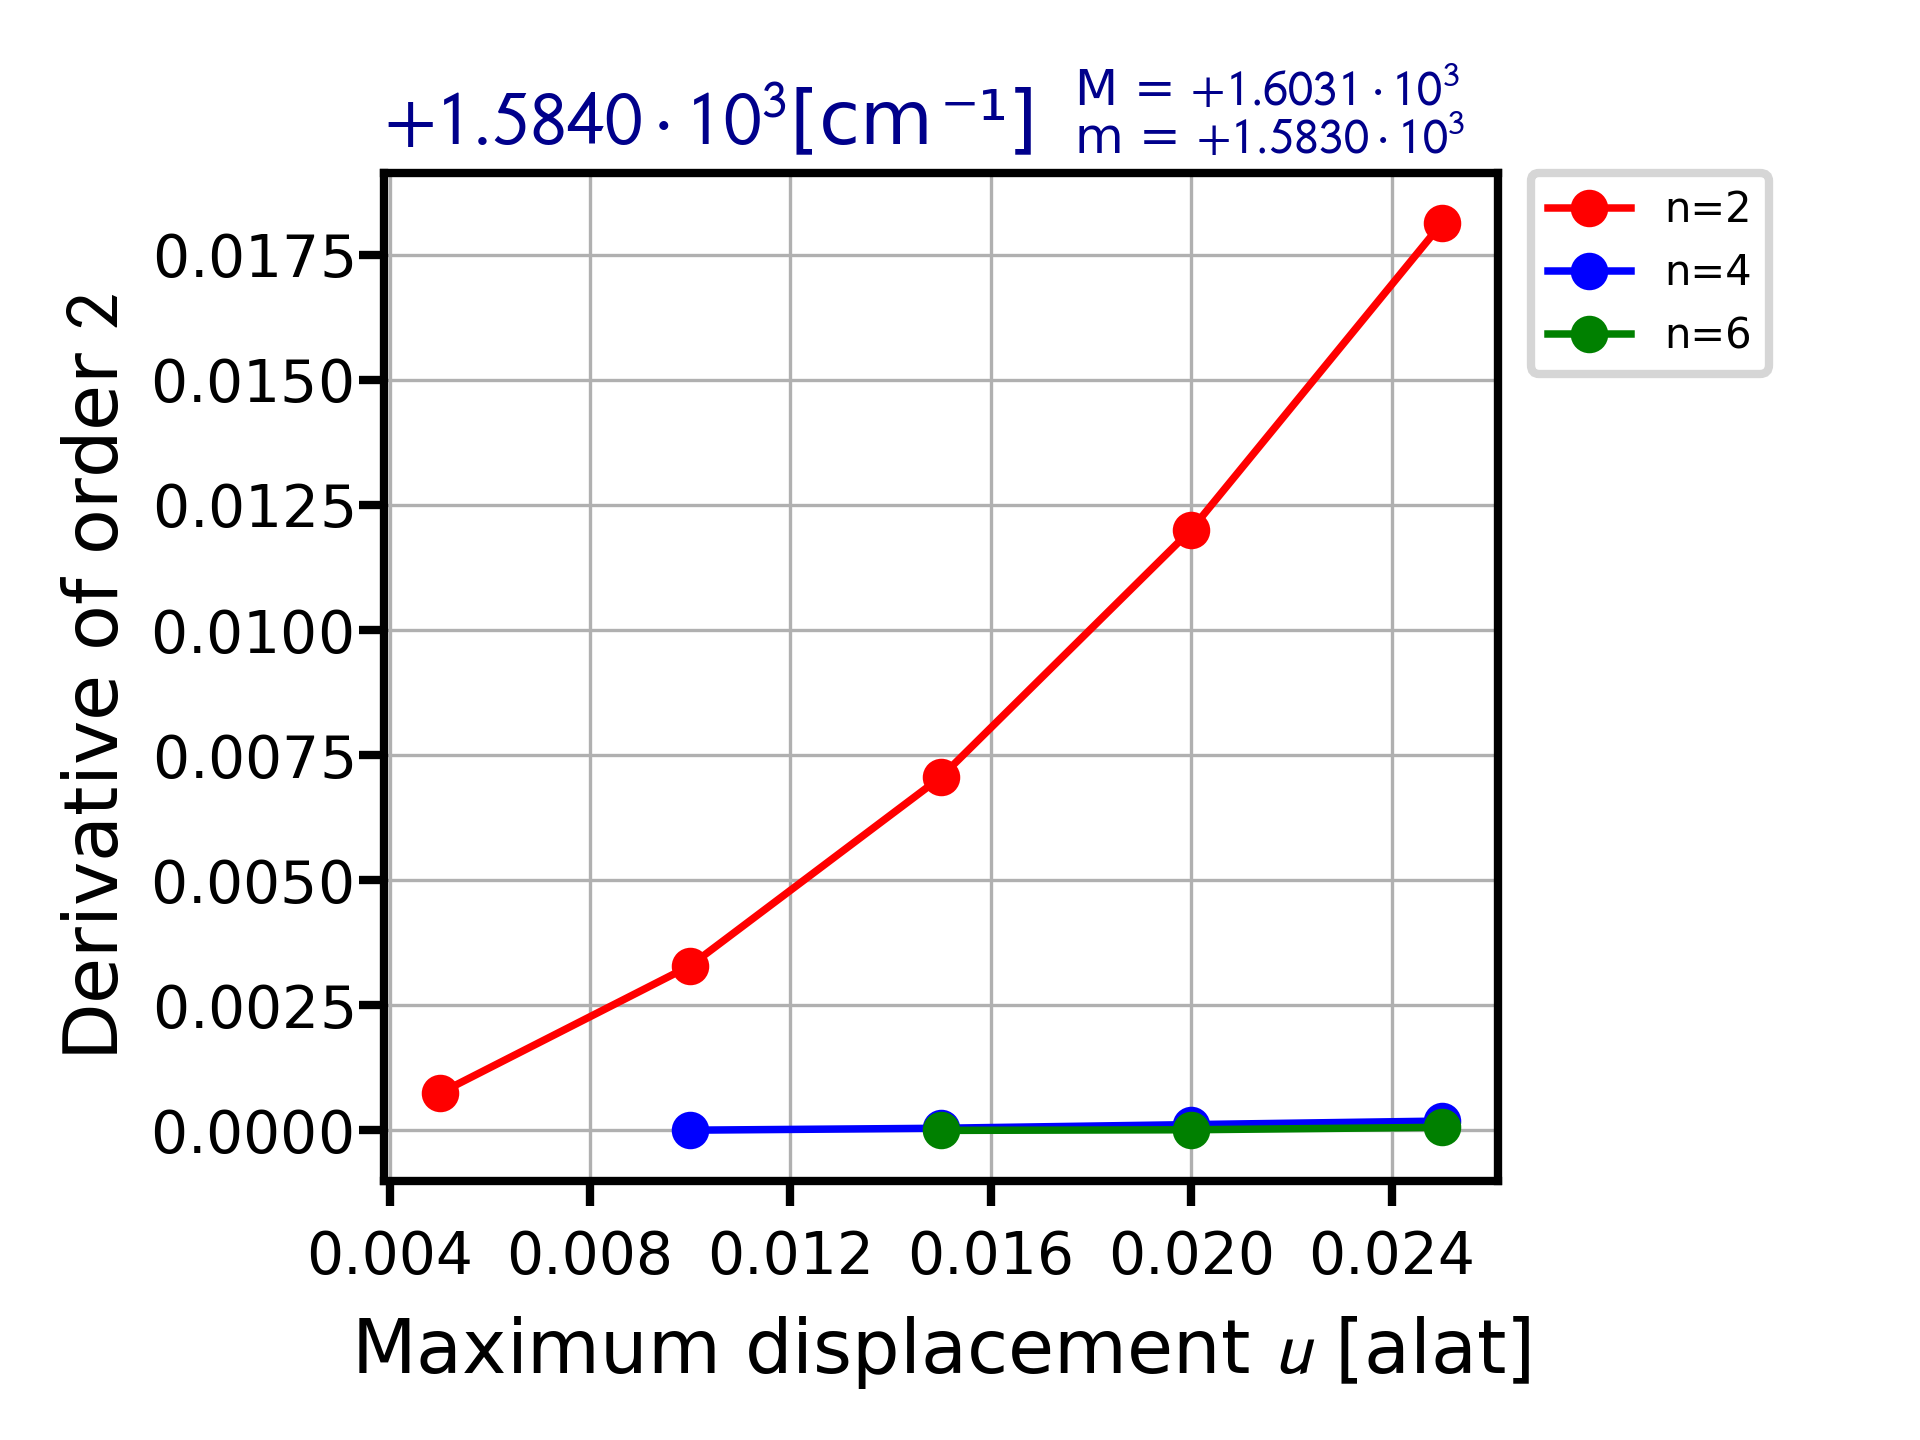" width="600" align="left"/>
</figure>

The previous plots can be used to determine the best range of displacements and order of polynomial fit. By analyzing the plot, we note that curves corresponding to the higher order of the polynomial used in the fit show a **<span style="color:green">horizontal plateau at about 1584 cm<sup>-1</sup></span>** . This can be assumed to be the **<span style="color:firebrick">converged</span>**  value for the second derivative, **<span style="color:firebrick">from the point of view of the fit</span>**  (see the analogue case in the tutorial **Energy vs. strain calculations**).

**<span style="color:firebrick">NOTICE</span>**  that, in this example, the values which are given above as output on the screen are **<span style="color:firebrick">not</span>**  directly the actual second derivative of the energy-vs-displacement curves, but the values of the frequency, i.e., combinations involving the **<span style="color:firebrick">square root of the derivative</span>**  (see **[Section 6.](#6)** for the explanation).

**<span style="color:#15317E">iii) excitingscripts.plot.status</span>**

Python visualization tool for the root mean squared (**RMS**) deviations of the effective **SCF** potential as a function of the iteration number during the **SCF** loop. It is executed as follows.

In [35]:
%%bash
cd run_diamond_phonon_g/gamma_1
python3 -m excitingscripts.plot.status displ_-0.005
cd ../..

Here, the entry on the command line must be specified and represents the name of the directory where an exciting calculation has been or is still running. The **`excitingscripts.plot.status`** is particularly useful in the latter case because one can follow "live" the convergence of the calculation. An example of the output of the script is the following.

<figure>
<img src=" 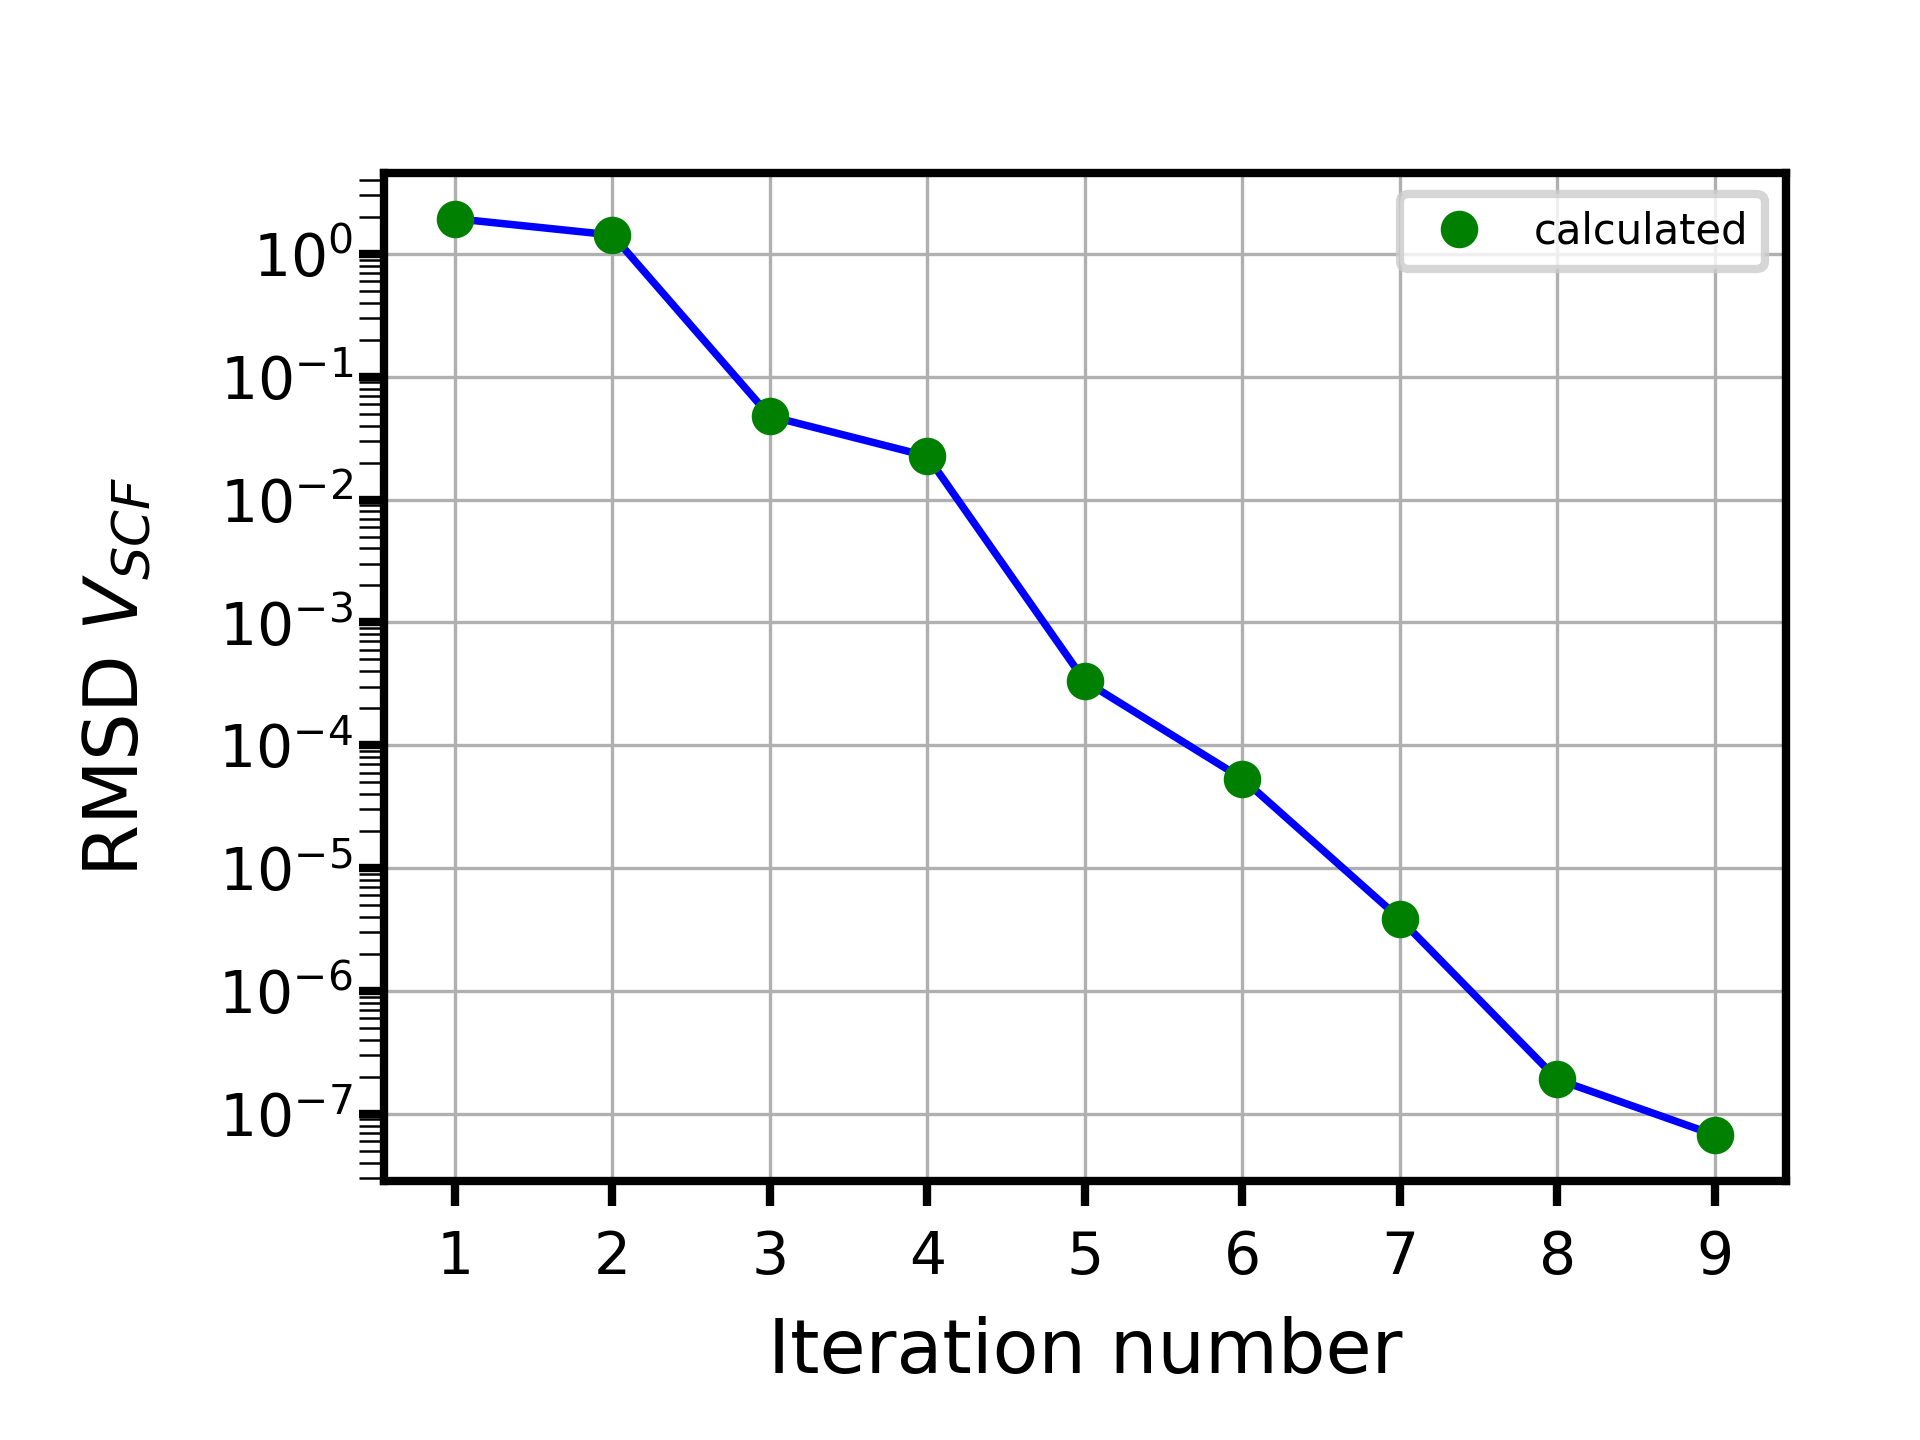" width="600" align="left"/>
</figure>

**<span style="color:#15317E">iii) excitingscripts.plot.atomforce</span>**

This script allows for the visualization of the force-vs-displacement curve. It is executed as follows.

In [37]:
%%bash
cd run_diamond_phonon_g/gamma_1
python3 -m excitingscripts.plot.atomforce
cd ../..

In the following, we display the result for the example mentioned above.

<figure>
<img src=" 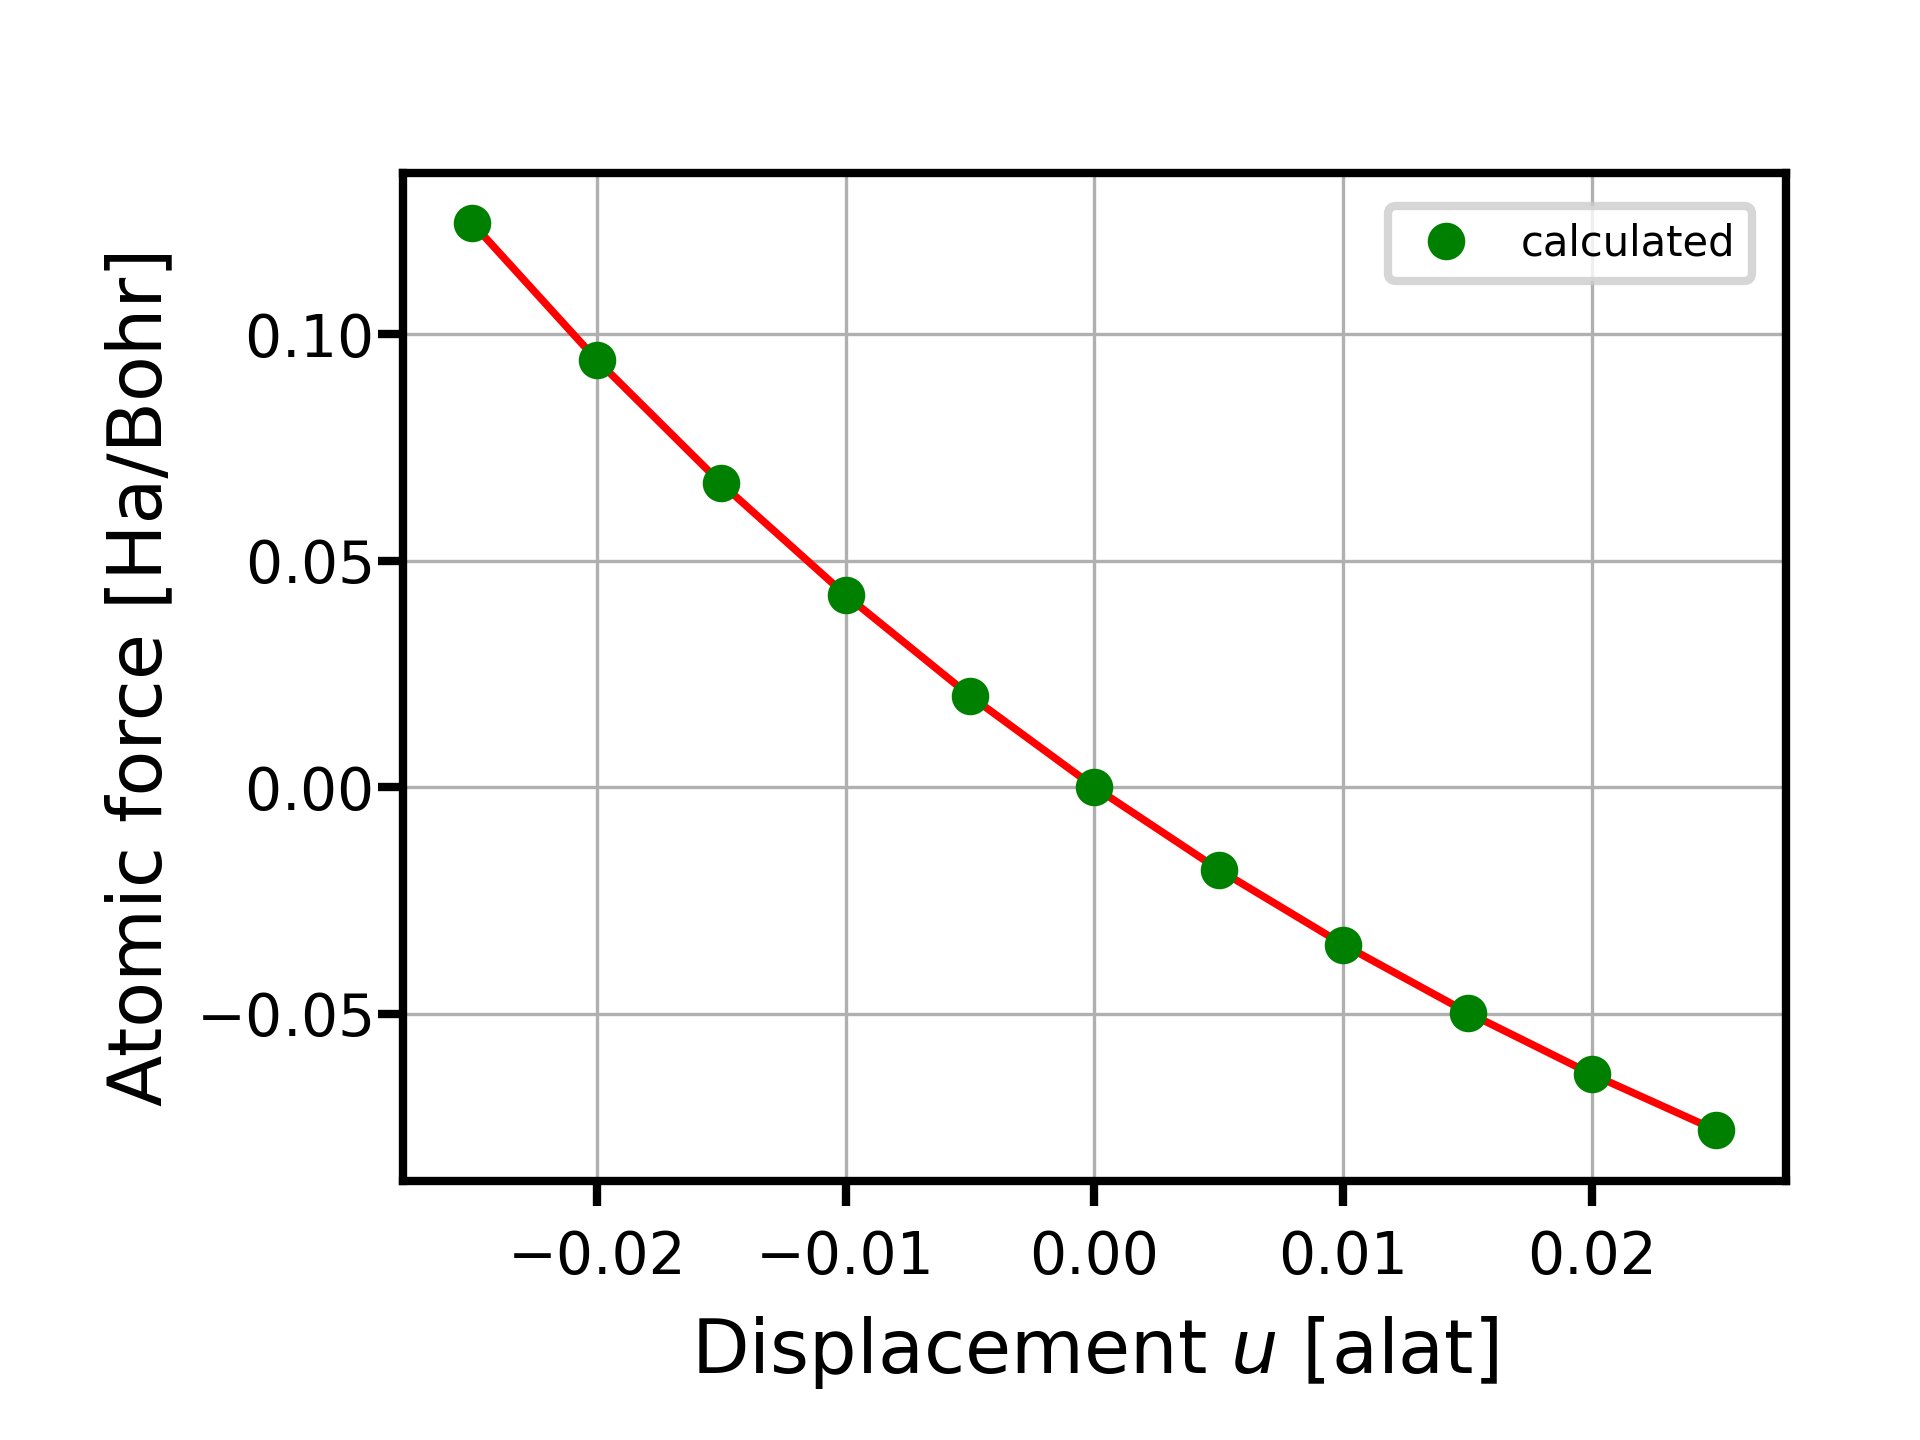" width="600" align="left"/>
</figure>

<a id='6'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">6. Post-Processing: How to Derive the Optical Phonon Frequency at q=0 (Γ point)</span>

**<span style="color:#15317E">i) Using the energy-vs-displacement curves</span>**

The total energy per unit cell of a crystal where the atoms are displaced by their equilibrium positions can be written as a Taylor series

$$ E({\mathbf{u}}) = E_0 + \frac{1}{2} \sum_{\mathbf{R, R'}}\mathbf{u}(\mathbf{R})\: \mathbf{\Phi} (\mathbf{R, R'}) \:\mathbf{u}(\mathbf{R'}) + O(\mathbf{u}^3) $$

where $E_0$ is the energy corresponding to the equilibrium structure, $\mathbf{u}(\mathbf{R})$ is an atomic displacement in the cell $\mathbf{R}$, $\mathbf{\Phi} (\mathbf{R, R'})$ is the inter-atomic force-constants matrix, and $O(\mathbf{u}^3)$ includes all orders higher than two in the displacements $\mathbf{u}$. For small displacements, terms beyond the harmonic approximation (which retains only terms that are quadratic in $\mathbf{u}$) can be neglected. For the diamond structure and a phonon pattern corresponding to the optical phonon at the **Γ** point, the displacements of the 2 atoms in the unit cell can be given as

$$ \mathbf{u}_1(\mathbf{R}) = (0, 0, 0)$$
$$ \mathbf{u}_2(\mathbf{R}) = a (u, u, u)$$

where $a$ is the lattice constant. The same displacements hold in all unit cells of the crystal. Therefore, for an optical phonon at **q**=0, the total energy per unit cell of the crystal can be written as (see details **[here](https://www.exciting-code.org/uploads/exciting/frozen-phonon-G-X.pdf)**):

$$E({\mathbf{u}}) = E_0 + \frac{3}{4} m \: a^2 \: (\omega_{\text{opt}})^2 \: u^2$$

Using appropriate values for $m$ and $a$ and their units, the phonon frequency of the optical mode at the **Γ** point for the diamond structure is given directly from the square root of the second derivative of the energy-vs-displacement curves. This is the output of the fit procedure exposed above if the order of the derivative is taken equal to 2. The optical phonon frequency is obtained from the **<span style="color:mediumblue">plateau value</span>** of the second-order derivative at zero displacement of the energy-vs-displacement curves. For more details on the procedure used for extracting numerical derivatives, see the tutorial **Energy vs. strain calculations**, where the same approach is used for calculating elastic constants.

**<span style="color:#15317E">i) Using the energy-vs-displacement curves</span>**

Using the same phonon displacement pattern as above, the component in the x direction of the force acting on the second atom is (within the harmonic approximation):

$$F_{2x}({\mathbf{u}}) = -\frac{1}{2} m \: a \: (\omega_{\text{opt}})^2 \: u$$
This force obviously vanishes in the equilibrium configuration ($u=0$). Similarly to the previous case, the frequency is obtained from the **<span style="color:mediumblue">plateau value</span>** of the first-order derivative at zero displacement of the force-vs-displacement curves.

**<span style="color:green">Exercises</span>**
- The frequency values which are obtained in this example using the quoted parameters, are not realistic. Check the convergence of the optical phonon frequency for diamond with respect of the value of the <code><span style="color:mediumblue">ngridk</span></code> and <code><span style="color:mediumblue">rgkmax</span></code> attributes using 
  1. derivatives of the total energy,
  2. derivatives of the force acting on the atoms.
  
  
- Repeat all the calculations for Silicon.

<hr style="border:2px solid #DDD"> </hr>